<a href="https://www.kaggle.com/code/ramukhtaras/marketing-strategy-bike-share-company-eda?scriptVersionId=101976139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Introduction**:

We are going to analyze CYCLISTICS data for the capstone project of the Google Data Analytics certificate. For this task, We are going to follow following data analysis processes : Ask, Prepare, Process, Analyze, Share and Act.

**Scenario**:
The director of marketing of Cyclistic, Lily Moreno, believes that the company’s future growth depends on maximizing the number of annual memberships. Hence, the marketing analyst team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the analytics team could be able to design a new marketing strategy to convert casual riders into annual members. 

There are three questions will guide the future marketing campaign,
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

For this analysis we are going to focus on the first question,**How casual riders and annual members use Cyclistic bikes differently?**

**Phase 1: ASK**

**Business Task:**
Analyse past 12 months trip data and discover the connections between members with annual subscription and casual riders.

 Are annual members much more profitable than casual riders? if so, design a marketing strategies or a campaign that helps us converting casual riders into annual members
 
**Time period for consideration:**
 Jan2021 to Dec2021
 
 
**Key Stakholders:**

**Primary Stakeholders:**
    Lily Moreno, Director of Marketing
    Cyclistic Executive Team
    
**Secondary Stakeholders:**
    Marketing Analytics Team


**Phase 2: PREPARE**

**Data Source:** 
Past 12 month of original bike share data set from 01/01/2021 to 31/12/2021 was extracted as 12 zipped (.csv files).
Source data publicly available at [AWS S3 bucket](https://divvy-tripdata.s3.amazonaws.com/index.html)
The data is made available and licensed by Motivate International Inc under this [license](https://ride.divvybikes.com/data-license-agreement).

For this analysis, we have used kaggle dataset at **divvy-tripdata-2021** by JORGE AREVALO LA ROSA JUNIOR

**Data credibility:**
The data set is reliable, the data is complete and accurate for the chosen time window. The data are original first party information. These data are comprehensive, current and cited.

**Data integrity:**
All 12 datasets consists of 13 columns and each column has correct type of data.

**Data privacy:**
The company has license to the data. Rider's PII are hidden through tokenisation.



**Phase 3: PROCESS**

In this stage, we are going to read, clean, organize and analyze the data.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/divvytripdata2021/202110-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202105-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202109-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202111-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202107-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202108-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202106-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202101-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202103-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202104-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202102-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202112-divvy-tripdata.csv


In [2]:
#First we are going to combine all dataset to ease out workflow

datasets = '''../input/divvytripdata2021/202101-divvy-tripdata.csv
../input/divvytripdata2021/202102-divvy-tripdata.csv
../input/divvytripdata2021/202103-divvy-tripdata.csv
../input/divvytripdata2021/202104-divvy-tripdata.csv
../input/divvytripdata2021/202105-divvy-tripdata.csv
../input/divvytripdata2021/202106-divvy-tripdata.csv
../input/divvytripdata2021/202107-divvy-tripdata.csv
../input/divvytripdata2021/202108-divvy-tripdata.csv
../input/divvytripdata2021/202109-divvy-tripdata.csv
../input/divvytripdata2021/202110-divvy-tripdata.csv
../input/divvytripdata2021/202111-divvy-tripdata.csv
../input/divvytripdata2021/202112-divvy-tripdata.csv'''.split("\n")

dfs = [pd.read_csv(x,engine="c") for x in datasets]
df = pd.concat(dfs, ignore_index = "True")
del dfs

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [6]:
df["trip_duration"] = df["ended_at"]-df["started_at"]
df["trip_day"] = df["started_at"].dt.day_name()
df["trip_month"] = df["started_at"].dt.month_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,trip_day,trip_month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25,Saturday,January
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04,Wednesday,January
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20,Thursday,January
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42,Thursday,January
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43,Saturday,January


In [7]:
df.shape

(5595063, 16)

In [8]:
df.duplicated().sum()

0

In [9]:
np.where(df["started_at"]<=df["ended_at"], 0, 1).sum()

147

In [10]:
df = df[df["started_at"]<=df["ended_at"]]

In [11]:
df.shape

(5594916, 16)

**Phase 4: ANALYZE**


In [12]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,trip_duration
count,5.594916e+06,5.594916e+06,5.590146e+06,5.590146e+06,5594916
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01,0 days 00:21:56.179715298
std,4.608647e-02,2.872127e-02,4.618924e-02,2.889966e-02,0 days 02:58:20.217623640
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,0 days 00:00:00
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01,0 days 00:06:45
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01,0 days 00:12:00
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01,0 days 00:21:47
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01,38 days 20:24:09


In [13]:
df1 = df.loc[(df["trip_duration"]>pd.Timedelta(0))] \
    .groupby(['member_casual'], as_index=False) \
    .agg({'trip_duration':'mean', 'ride_id':'count'}) \
    .sort_values('trip_duration') \
    .rename(columns={'trip_duration': 'mean_trip_duration', 'ride_id':'count'}) 

<function matplotlib.pyplot.show(close=None, block=None)>

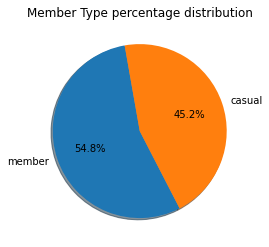

In [14]:
x=df1['member_casual']
y=df1['count']
plt.pie(y, labels = x, autopct = '%1.1f%%', shadow = True, startangle = 100)
plt.title("Member Type percentage distribution")
plt.show

In [15]:
import math

total_ridecount = sum(df1["count"])
member_percentage = (df1.loc[1,'count']/total_ridecount)*100
casual_percentage = (df1.loc[0,'count']/total_ridecount)*100

print("{}% of users are members and {}% of users are casual riders".format(math.trunc(member_percentage), math.trunc(casual_percentage)))
print("For every single ride, members ride {} mins on average while the casual riders ride {} mins".format(df1.loc[1,'mean_trip_duration'].seconds//60, df1.loc[0,'mean_trip_duration'].seconds//60))

54% of users are members and 45% of users are casual riders
For every single ride, members ride 13 mins on average while the casual riders ride 32 mins


In [16]:
df2 = df.loc[ (df["trip_duration"] > pd.Timedelta(0)) ] \
    .groupby( ['member_casual', 'rideable_type'], as_index=False ) \
    .agg({'ride_id':'count','trip_duration':'mean'}) \
    .sort_values('ride_id', ascending=False) \
    .rename(columns={"rideable_type":"rideable_type_count", "trip_duration":"avg_trip_duration","ride_id":"ride_count"})

df2

,member_casual,rideable_type_count,ride_count,avg_trip_duration
3,member,classic_bike,1984219,0 days 00:14:08.861878653
0,casual,classic_bike,1266527,0 days 00:28:55.952686361
5,member,electric_bike,1081526,0 days 00:12:41.586045088
2,casual,electric_bike,949803,0 days 00:19:49.765489264
1,casual,docked_bike,312334,0 days 01:21:29.759148859
4,member,docked_bike,1,0 days 00:02:38


In [17]:
fig = df.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(fig, x = 'rideable_type', y = 'ride_id',color = 'member_casual', barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual', 'rideable_type' : 'Rideable Type'},
        hover_name = 'member_casual',
        hover_data = {'member_casual': False, 'trip_duration': False},
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'}) 

- From the above data, it is obvious that members prefer classic bike more and followed by electric bikes. We can also say that members almost completely avoided using docked bikes. However, this can be that company may offer less docked bikes or not available for members
- Casual riders on average ride more than members. Apparently, members mostly pay for subcription for their daily commuting.
- Casual riders prefer classic bike, followed by electric bikes and docked bikes. Casual riders use docked bike for about 1hour 20mins on average, making it highest used type than any other.

In [18]:
df3 = df.loc[ (df["trip_duration"] > pd.Timedelta(0))] \
      .groupby(['member_casual','trip_day'],as_index=False) \
      .agg({'ride_id':'count','trip_duration':'mean'}) \
      .sort_values('ride_id',ascending=False) \
      .rename(columns={"ride_id":"ride_count","trip_duration":"avg_trip_duration"})

In [19]:
df3

,member_casual,trip_day,ride_count,avg_trip_duration
2,casual,Saturday,557934,0 days 00:34:42.597986500
3,casual,Sunday,481048,0 days 00:37:34.257336066
13,member,Wednesday,477117,0 days 00:12:49.212421691
12,member,Tuesday,465474,0 days 00:12:47.345069756
11,member,Thursday,451490,0 days 00:12:46.621958404
7,member,Friday,446384,0 days 00:13:19.564816391
9,member,Saturday,433014,0 days 00:15:15.931330164
8,member,Monday,416181,0 days 00:13:14.895591100
10,member,Sunday,376086,0 days 00:15:39.553753662
0,casual,Friday,364037,0 days 00:30:21.106071635


- On Weekends, Casual rides ride more than members
- On Weekdays, Members uses bikes more than casual riders

In [20]:
fig1 = df.groupby(['trip_day', 'member_casual'], as_index=False).count()

px.line(fig1, x = 'trip_day', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'trip_day': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'trip_month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [21]:
df4 = df.loc[ (df["trip_duration"] > pd.Timedelta(0)) \
             & (df["member_casual"] == 'casual') ] \
    .groupby( ['trip_month'], as_index=False ) \
    .agg({'ride_id':'count','trip_duration':'mean'}) \
    .sort_values('ride_id', ascending=False) \
    .rename(columns={"ride_id":"ride_count"})

df4

,trip_month,ride_count,trip_duration
5,July,442011,0 days 00:32:47.610699733
1,August,412608,0 days 00:28:47.446864820
6,June,370636,0 days 00:37:07.556840134
11,September,363840,0 days 00:27:49.129128188
10,October,257203,0 days 00:28:40.699023728
8,May,256888,0 days 00:38:14.107996480
0,April,136590,0 days 00:38:01.563115894
9,November,106884,0 days 00:23:08.128681561
7,March,84028,0 days 00:38:09.660137097
2,December,69729,0 days 00:23:29.839392505


In [22]:
fig2 = df.groupby(['trip_month', 'member_casual'], as_index=False).count()

px.line(fig2, x = 'trip_month', y = 'ride_id', range_y = [0,600000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'trip_month': 'Month', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'trip_month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

In [23]:
df5 = df.loc[ (df["trip_duration"] > pd.Timedelta(0)) \
             & (df["member_casual"] == 'member') ] \
    .groupby( ['trip_month'], as_index=False ) \
    .agg({'ride_id':'count','trip_duration':'mean'}) \
    .sort_values('ride_id', ascending=False) \
    .rename(columns={"ride_id":"ride_count"})

df5

,trip_month,ride_count,trip_duration
11,September,392200,0 days 00:13:44.194604793
1,August,391637,0 days 00:14:06.145481657
5,July,380317,0 days 00:14:14.442288932
10,October,373953,0 days 00:12:30.186309509
6,June,358893,0 days 00:14:40.719537578
8,May,274691,0 days 00:14:38.417738477
9,November,253008,0 days 00:11:18.607012426
0,April,200602,0 days 00:14:41.449317554
2,December,177790,0 days 00:11:00.340913437
7,March,144456,0 days 00:13:58.237940964


In [24]:
df5 = df.loc[ (df["member_casual"]=='casual')
             & (df["trip_day"].isin(['Saturday','Sunday']))
             & (df["trip_duration"] > pd.Timedelta(0))
            ] \
    .groupby( ['start_station_name', 'end_station_name'], as_index=False ) \
    .agg({'ride_id':'count','trip_duration':'mean'}) \
    .sort_values('ride_id', ascending=False) \
    .rename(columns={"ride_id":"ride_count", "trip_duration":"avg_trip_duration"})

df5[:10]

,start_station_name,end_station_name,ride_count,avg_trip_duration
80831,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,5878,0 days 00:48:40.362538278
59056,Millennium Park,Millennium Park,3126,0 days 00:53:08.762635956
57582,Michigan Ave & Oak St,Michigan Ave & Oak St,2815,0 days 00:56:27.230905861
46570,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,2441,0 days 00:44:39.669807455
30499,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,1589,0 days 00:40:58.900566393
80733,Streeter Dr & Grand Ave,Millennium Park,1533,0 days 00:37:10.069797782
81327,Theater on the Lake,Theater on the Lake,1528,0 days 00:53:20.397905759
7931,Buckingham Fountain,Buckingham Fountain,1474,0 days 01:02:33.005427408
59141,Millennium Park,Streeter Dr & Grand Ave,1427,0 days 00:47:08.236159775
60319,Montrose Harbor,Montrose Harbor,1417,0 days 01:01:29.587861679


In [25]:
df6 = df.loc[ (df["start_station_name"] == df["end_station_name"])
             & (df["trip_duration"] > pd.Timedelta(0))] \
            .agg({'ride_id':'count','trip_duration':'mean'}) \
            .rename({"ride_id":"rideable_count", "trip_duration":"avg_trip_duration"})

df6

rideable_count                          337808
avg_trip_duration    0 days 00:38:51.420398569
dtype: object

In [26]:
df7 = df.loc[ (df["start_station_name"] != df["end_station_name"])
             & (df["trip_duration"] > pd.Timedelta(0))] \
            .agg({'ride_id':'count','trip_duration':'mean'}) \
            .rename({"ride_id":"rideable_count", "trip_duration":"avg_trip_duration"})

df7

rideable_count                         5256602
avg_trip_duration    0 days 00:20:51.063421959
dtype: object

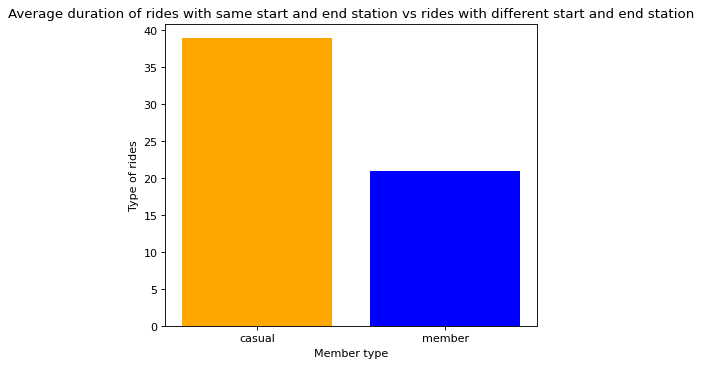

In [27]:
df6["avg_trip_duration"] = df6["avg_trip_duration"].total_seconds()/60.0
df7["avg_trip_duration"] = df7["avg_trip_duration"].total_seconds()/60.0

a = df6["avg_trip_duration"]
b = df7["avg_trip_duration"]
c = [a,b]
d = ["casual","member"]
 
from matplotlib.pyplot import figure

figure(figsize=(6,5), dpi=80)

plt.bar(d,c, color=('orange','b'))
plt.title("Average duration of rides with same start and end station vs rides with different start and end station")
plt.xlabel("Member type")
plt.ylabel("Type of rides")
  
plt.show()

**Phase 5: SHARE**

Insights from the above information will be shares to the marketing team.

**Phase 6: ACT**

Based on the above information ,The marketing team of the company will make conclusion.

Recommendation might be,
 - Marketing campaigns can be launched in July and august, as number of casual rides peaks in these months
 - Attractive advertisements, bill boards could be placed in top 10 stations
 - Incentives should be given to new riders
 - Discounts for long rides